In [1]:
# 保存实验数据
import numpy as np
np.random.seed(1234)
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import joblib
import matplotlib.pyplot as plt
# 解决中文和负号显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 使显示图标自适应
plt.rcParams['figure.autolayout'] = True

In [17]:
# 加载模型，并得出评价指标
length1=1350  
length2=1650
type = "mo"
def eval(y_valid,y_pre):
    TP, FN, FP, TN = 0,0,0,0
    for i, j in zip(y_valid,y_pre):
        if i==1 and j==1:
            TP += 1
        if i==1 and j==-1:
            FN += 1
        if i==-1 and j==1:
            FP += 1
        if i==-1 and j==-1:
            TN += 1

    accuracy=(TP+TN)/(TP+TN+FP+FN)*100
    precision=TP/(TP+FP)*100
    recall=TP/(TP+FN)*100
    F1=2*((precision*recall)/(precision+recall))
    auc = roc_auc_score(y_valid,y_pre)*100
    return accuracy,precision,recall,F1,auc

def save_result(index_name):

    clf = joblib.load(type+"_"+index_name+".dat")
    best_select = pd.read_csv(type+"_"+index_name+".csv")['0'].tolist()
    target_stock = pd.read_csv("./dataset/n_"+index_name+".csv")
    
    y_valid = target_stock[length2:-1]["trend"]
    if len(best_select) != 0:
            target_stock = target_stock.iloc[:,best_select]
    x_train = target_stock[0:length1-1]
    x_test = target_stock[length1-1:length2-2]
    x_valid = target_stock[length2-1:-2]
    # 归一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    x_valid = scaler.fit_transform(x_valid)

    y_pre = clf.predict(x_valid)
    acc = eval(y_valid,y_pre)

    # 将结果保存在文件中多目标
    # f = open ('R_mo_'+index_name+'.txt','w')
    f = open ('./实验结果/R_'+type+'_.txt','a')
    # 将结果保存在文件中单目标
    # f = open ('./实验结果/R_so_.txt','a')
    print(index_name,file = f)
    print ("Accuracy:%.2f, F1-score:%.2f, AUC:%.2f, NumofFeature:%d"%(acc[0],acc[3],acc[4],len(best_select)),file = f)
    f.close()

In [18]:
stock_list = ["DJIA","HangSeng","CSI300"]
# stock_list = ["CSI300"]
for item in stock_list:
    print(item)
    save_result(item)

DJIA
HangSeng
CSI300


In [60]:
# 加载模型，并得出评价指标
# 保存恒生数据集多目标对比
length1=1350  
length2=1650
type = "mo"
def eval(y_valid,y_pre):
    TP, FN, FP, TN = 0,0,0,0
    for i, j in zip(y_valid,y_pre):
        if i==1 and j==1:
            TP += 1
        if i==1 and j==-1:
            FN += 1
        if i==-1 and j==1:
            FP += 1
        if i==-1 and j==-1:
            TN += 1

    accuracy=(TP+TN)/(TP+TN+FP+FN)*100
    precision=TP/(TP+FP)*100
    recall=TP/(TP+FN)*100
    F1=2*((precision*recall)/(precision+recall))
    auc = roc_auc_score(y_valid,y_pre)*100
    return accuracy,precision,recall,F1,auc

def save_result(index_name):

    clf = joblib.load(type+"_"+index_name+".dat")
    best_select = pd.read_csv(type+"_"+index_name+".csv")['0'].tolist()
    target_stock = pd.read_csv("./dataset/n_"+index_name+".csv")
    
    y_valid = target_stock[length2:-1]["trend"]
    if len(best_select) != 0:
            target_stock = target_stock.iloc[:,best_select]
    x_train = target_stock[0:length1-1]
    x_test = target_stock[length1-1:length2-2]
    x_valid = target_stock[length2-1:-2]
    # 归一化
    scaler = MinMaxScaler(feature_range=(0, 1))
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    x_valid = scaler.fit_transform(x_valid)

    y_pre = clf.predict(x_valid)
    acc = eval(y_valid,y_pre)

    # 将结果保存在文件中多目标
    # f = open ('R_mo_'+index_name+'.txt','w')
    f = open ('./实验结果/MOComp_.txt','a')
    # 将结果保存在文件中单目标
    # f = open ('./实验结果/R_so_.txt','a')
    print(type,file = f)
    print ("Accuracy:%.2f, F1-score:%.2f, AUC:%.2f, NumofFeature:%d"%(acc[0],acc[3],acc[4],len(best_select)),file = f)
    f.close()

In [61]:
# 保存恒生数据集多目标对比
stock_list = ["NSGA3","NSGA2","awGA","RVEA"]
# stock_list = ["CSI300"]
for item in stock_list:
    print(item)
    type = "mo"+item
    save_result("HangSeng")

NSGA3
NSGA2
awGA
RVEA


Epoch 1/100
40/40 [==============================] - 3s 41ms/step - loss: 0.7037 - accuracy: 0.5180 - val_loss: 0.6919 - val_accuracy: 0.5217
Epoch 2/100
40/40 [==============================] - 1s 14ms/step - loss: 0.6922 - accuracy: 0.5345 - val_loss: 0.6942 - val_accuracy: 0.5221
Epoch 3/100
40/40 [==============================] - 1s 14ms/step - loss: 0.6907 - accuracy: 0.5221 - val_loss: 0.6868 - val_accuracy: 0.5266
Epoch 4/100
40/40 [==============================] - 1s 15ms/step - loss: 0.6884 - accuracy: 0.5406 - val_loss: 0.6857 - val_accuracy: 0.5146
Epoch 5/100
40/40 [==============================] - 1s 14ms/step - loss: 0.6821 - accuracy: 0.5656 - val_loss: 0.6961 - val_accuracy: 0.5219
Epoch 6/100
40/40 [==============================] - 1s 14ms/step - loss: 0.6774 - accuracy: 0.5834 - val_loss: 0.6886 - val_accuracy: 0.5187
Epoch 7/100
40/40 [==============================] - 1s 15ms/step - loss: 0.6839 - accuracy: 0.5555 - val_loss: 0.6936 - val_accuracy: 0.5299
Epoch 

d:\anconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


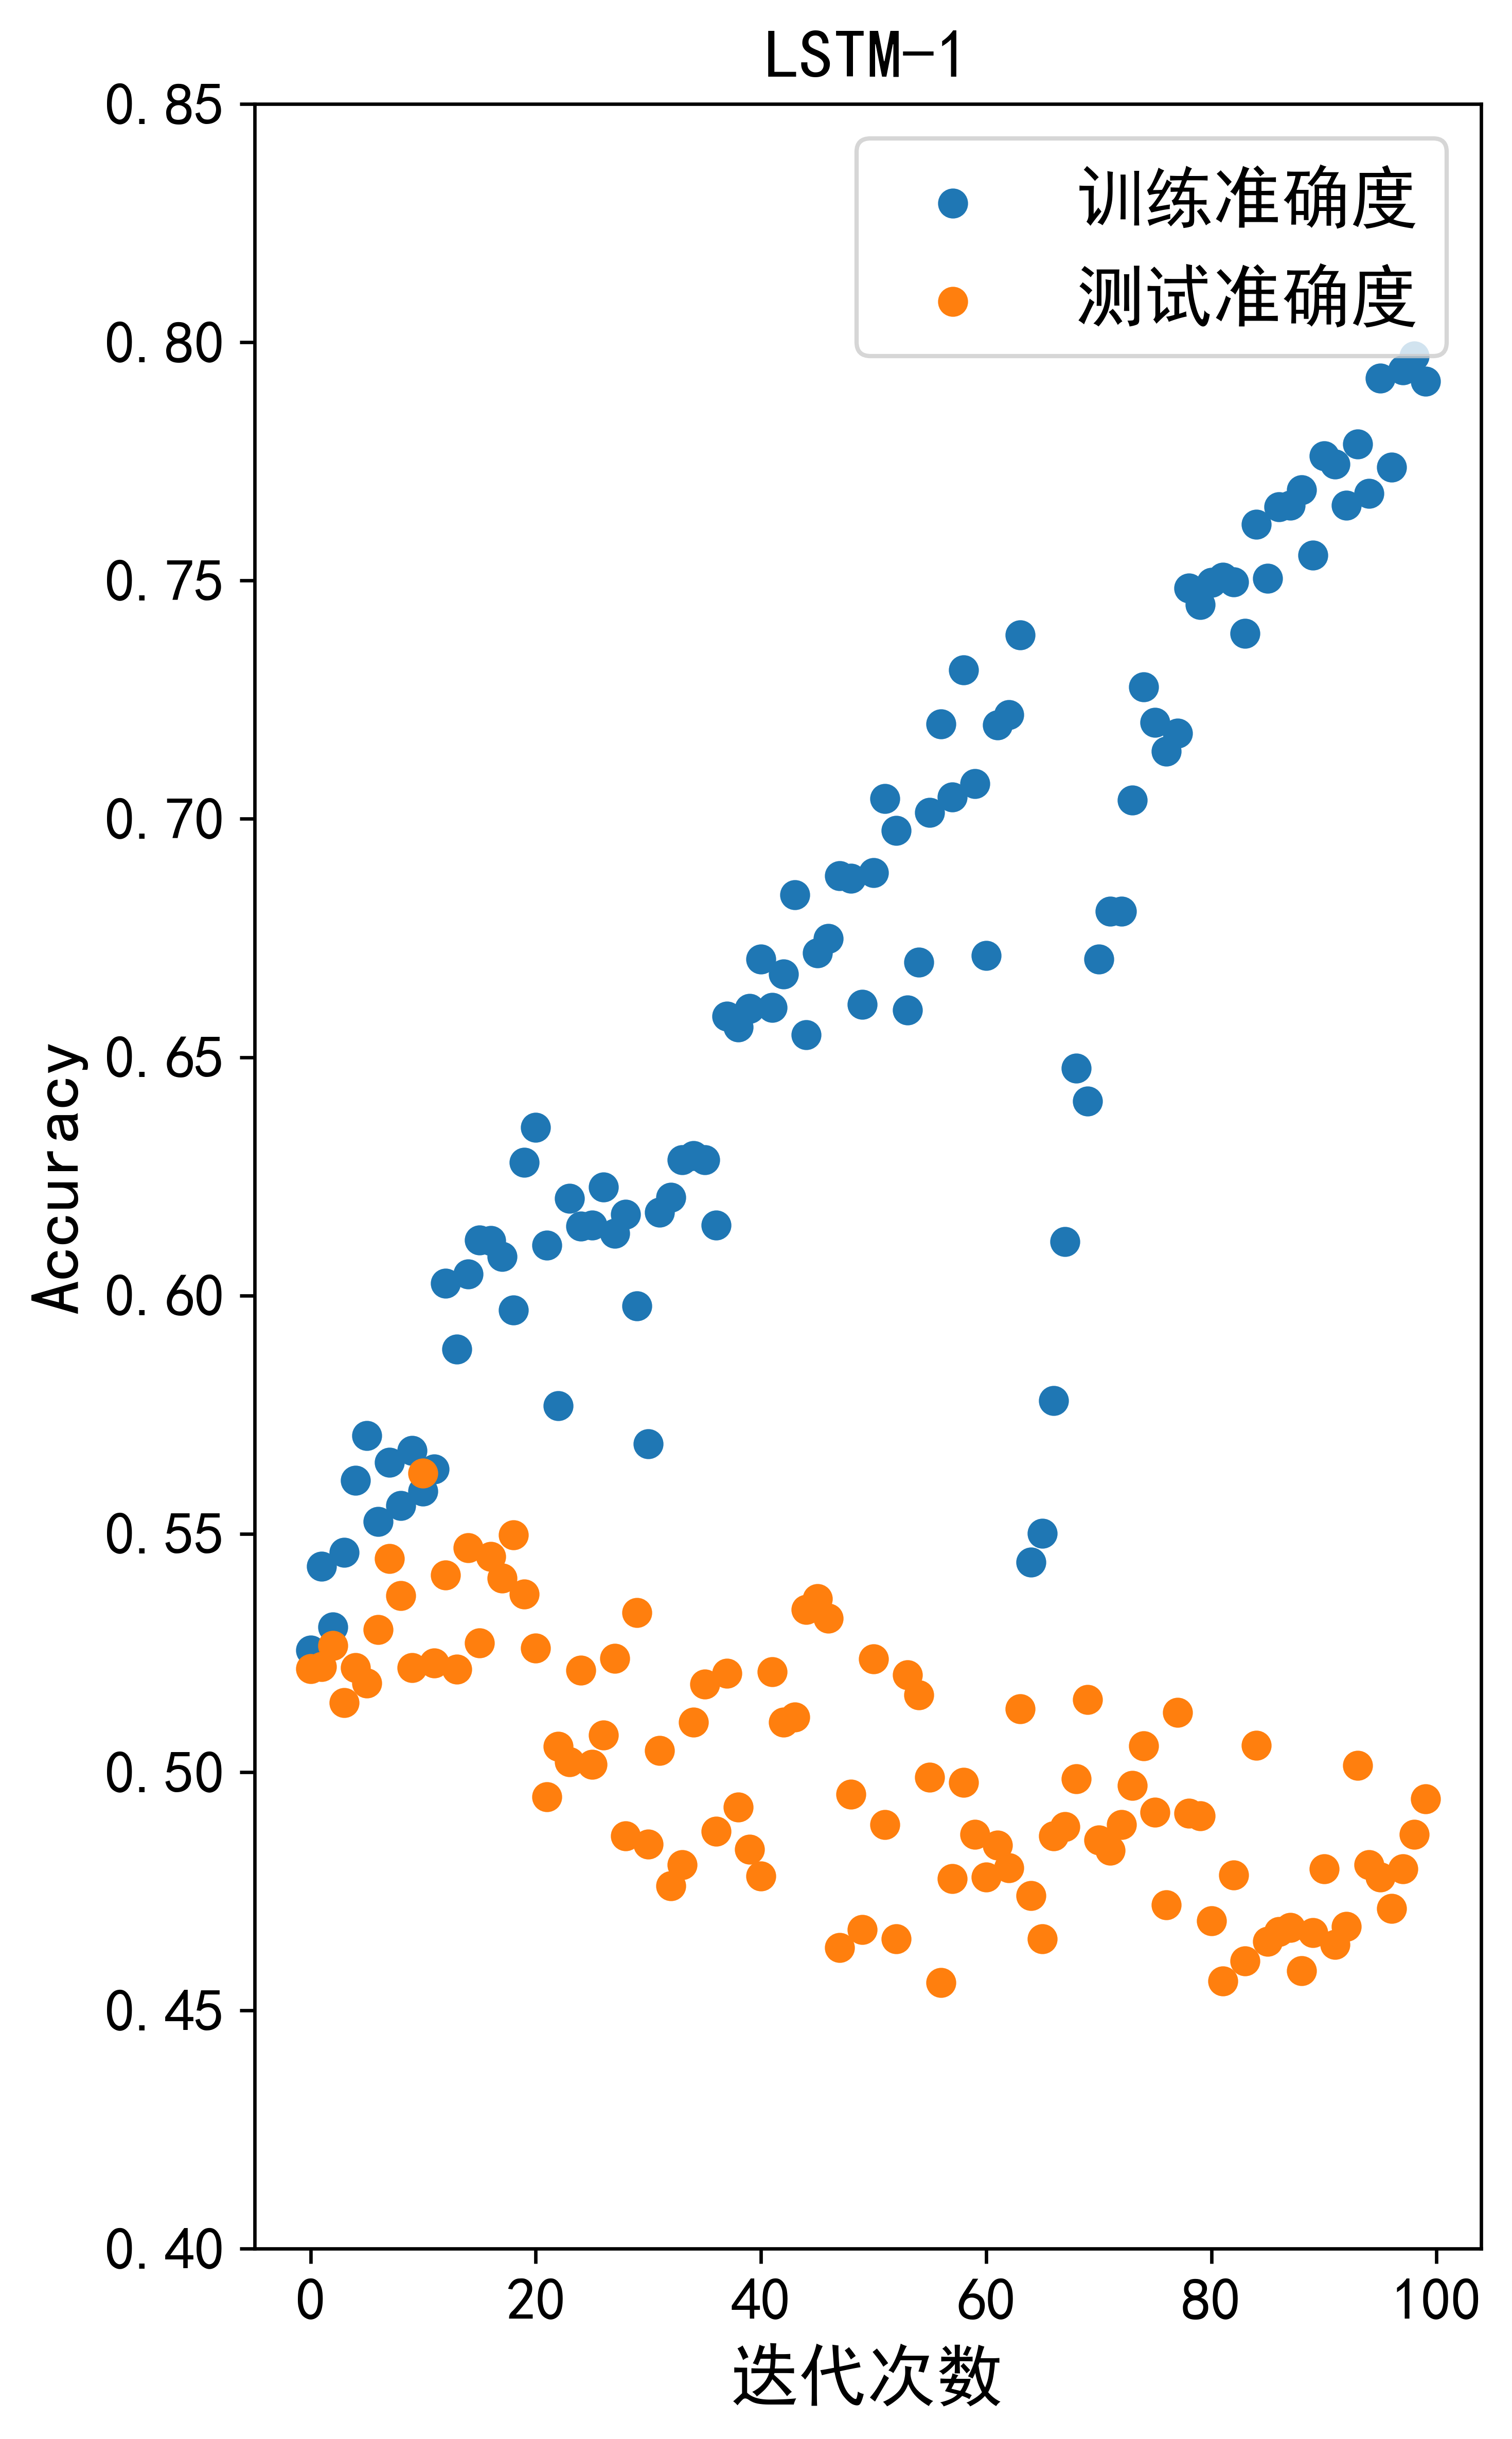

In [8]:
# 比较不同的原生模型
import pandas as pd
import numpy as np
np.random.seed(987)
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


'''=======LSTM准备数据=========='''
target_stock = pd.read_csv("./dataset/n_HangSeng.csv")
length = 1600
time_stamp = 50
# 划分训练集与验证集
train = target_stock[0:length + time_stamp]
test = target_stock[length - time_stamp:]
# 归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train)
x_train, y_train = [], []
# 训练集
for i in range(time_stamp, len(train)):
    x_train.append(scaled_data[i - time_stamp:i])
    y_train.append(scaled_data[i, 5])
x_train, y_train = np.array(x_train), np.array(y_train)
# 测试集
scaled_data = scaler.fit_transform(test)
x_test, y_test = [], []
for i in range(time_stamp, len(test)):
    x_test.append(scaled_data[i - time_stamp:i])
    y_test.append(scaled_data[i, 5])
x_test, y_test = np.array(x_test), np.array(y_test)
'''=======机器学习准备数据=========='''
# data = "HangSeng"
# length1=1350  
# length2=1650
# target_stock = pd.read_csv("./dataset/n_"+data+".csv")
# # target_stock = target_stock[["Open","High","Low","Close","Volume","trend"]]
# y_train= target_stock[1:length1]["trend"]
# y_test = target_stock[length1:length2-1]["trend"]
# y_valid = target_stock[length2:-1]["trend"]
# x_train = target_stock[0:length1-1]
# x_test = target_stock[length1-1:length2-2]
# x_valid = target_stock[length2-1:-2]
# # 归一化
# scaler = MinMaxScaler(feature_range=(0, 1))
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.fit_transform(x_test)
# x_valid = scaler.fit_transform(x_valid)

# 模型训练
model_name = "LSTM-1"

'''=======机器学习模型=========='''
# svc_clf = XGBClassifier()
# svc_clf.fit(x_train,y_train)
# y_pre=svc_clf.predict(x_test)

model=Sequential()
# model.add(LSTM(units=100,input_dim = x_train.shape[-1],input_length = x_train.shape[1],return_sequences=True))
model.add(LSTM(units=64,input_dim = x_train.shape[-1],input_length = x_train.shape[1],return_sequences=True))
# model.add(LSTM(units=32))    
#    
# model.add(Bidirectional(LSTM(units=64,return_sequences=True),input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(Bidirectional(LSTM(units=64,return_sequences=True)))
# model.add(Bidirectional(LSTM(units=32,return_sequences=True),input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(Bidirectional(LSTM(units=32,return_sequences=True)))
# model.add(Bidirectional(LSTM(units=32,return_sequences=True),input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(Bidirectional(LSTM(units=32)))
model.add(Dense(10))
model.add(Dense(units = 1,activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2,batch_size=32, verbose=1)

y_pre = model.predict_classes(x_test)

#神经网络画图
fig = plt.figure(figsize=(5,8),dpi=600) 
plt.scatter(np.arange(0,100,1),history.history['accuracy'],label='训练准确度')
plt.scatter(np.arange(0,100,1),history.history['val_accuracy'],label='测试准确度')
plt.title(model_name,size=16)
plt.xticks(size=14)
plt.yticks(size=14)
my_y_ticks = np.arange(0.40, 0.9, 0.05)
plt.yticks(my_y_ticks)
plt.xlabel("迭代次数",size=16)
plt.ylabel("Accuracy",size=16)
plt.legend(fontsize=16)
fig.savefig("./实验结果/"+model_name+".svg")

# 保存结果
# report = classification_report(y_test,y_pre.reshape(-1),digits=4)
# print()
# acc = eval(y_test,y_pre)
# f = open ('./实验结果/ModelComp_.txt','a')
# print("HangSeng",end=" ",file = f)
# print(model_name,file=f)
# print (report,file = f)
# f.close()


In [13]:
import random
a = []
for i in range(100):
    a.append(random.randint(589,710)/1234)
print(a)
csv = pd.DataFrame(a)
csv = csv.to_csv("try_result")

[0.5632090761750406, 0.5575364667747164, 0.4821717990275527, 0.5453808752025932, 0.5153970826580226, 0.5, 0.47893030794165314, 0.49108589951377635, 0.5623987034035657, 0.47893030794165314, 0.5753646677471637, 0.5324149108589952, 0.5518638573743923, 0.5072933549432739, 0.5145867098865479, 0.47811993517017826, 0.5591572123176661, 0.5040518638573744, 0.5275526742301458, 0.534035656401945, 0.48703403565640196, 0.4862236628849271, 0.513776337115073, 0.559967585089141, 0.5299837925445705, 0.49351701782820095, 0.4829821717990275, 0.5437601296596435, 0.5194489465153971, 0.5153970826580226, 0.5291734197730956, 0.5356564019448946, 0.5170178282009724, 0.5413290113452188, 0.5332252836304701, 0.49108589951377635, 0.5429497568881686, 0.4813614262560778, 0.5502431118314425, 0.5437601296596435, 0.5048622366288493, 0.5210696920583469, 0.5307941653160454, 0.5024311183144247, 0.5032414910858996, 0.5388978930307942, 0.5494327390599676, 0.48703403565640196, 0.513776337115073, 0.546191247974068, 0.483792544